## CISC /CMPE 251 Assignment 3 Part 2: Practical
Lauren Steel - 20218337 

October 22 2024 

## Part 1: Classification metrics using scikit learn 
- Build a logistic model with default parameters, fit to the input and output features x and y
- Use the model to predict the classification of instances in x
- Calculate the confusion matrix for the model
- Calculate the accuracy for the model
- Calculate the precision for the model
- Calculate the recall for the model
- Calculate kappa for the model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler

# load dataset
nba_data = pd.read_csv('nbaallelo_log.csv')

# set up random state
random_state = 123

# sample data
sample_data = nba_data.sample(n=500, random_state=random_state)

X = sample_data[['elo_i']]
# convert win->1 loss->0
y = sample_data['game_result'].apply(lambda x: 1 if x == 'W' else 0)  

# standardize scores
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# initialize and fit the log reg model
model = LogisticRegression()
model.fit(X_train, y_train)

# predicting classifications for the test set
y_pred = model.predict(X_test)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Kappa: {kappa:.3f}")


Confusion Matrix
[[58 18]
 [44 30]]
Accuracy: 0.587
Precision: 0.625
Recall: 0.405
Kappa: 0.169


## Part 2: Regression metrics using scikit-learn

- Initialize and fit a multiple linear regression model
- Use the model to predict the prices of instances in X
- Calculate mean absolute error for the model
- Calculate mean squared error for the model
- Calculate root mean squared error for the model
- Calculate R-squared for the model

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
diamonds = pd.read_csv("diamonds.csv")
data = diamonds[['carat', 'table', 'price']]

# split the data 
X = data[['carat', 'table']]
y = data['price']

# take a sample from the dataset
random_state = 123
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=random_state)

# initialize and fit lin reg model
model = LinearRegression()
model.fit(X_sample, y_sample)

# use the model to predict prices of the instances in X_sample
y_pred = model.predict(X_sample)

# Calculate the regression metrics
mae = mean_absolute_error(y_sample, y_pred)
mse = mean_squared_error(y_sample, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_sample, y_pred)

# Display the results
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R-squared: {r_squared:.3f}")


MAE: 989.579
MSE: 2355928.362
RMSE: 1534.903
R-squared: 0.842


## Part 3: Evaluating models using plots in scikit-learn

- Initialize and fit a multiple linear regression model
- Use the model to predict the prices of instances in X
- Compute the prediction errors
- Plot prediction errors vs predicted values. 
- Label the x-axis as ’Predicted’ and the y-axis as ’Prediction error’ & include a dashed line at y = 0
- Generate a partial dependence display for both input features

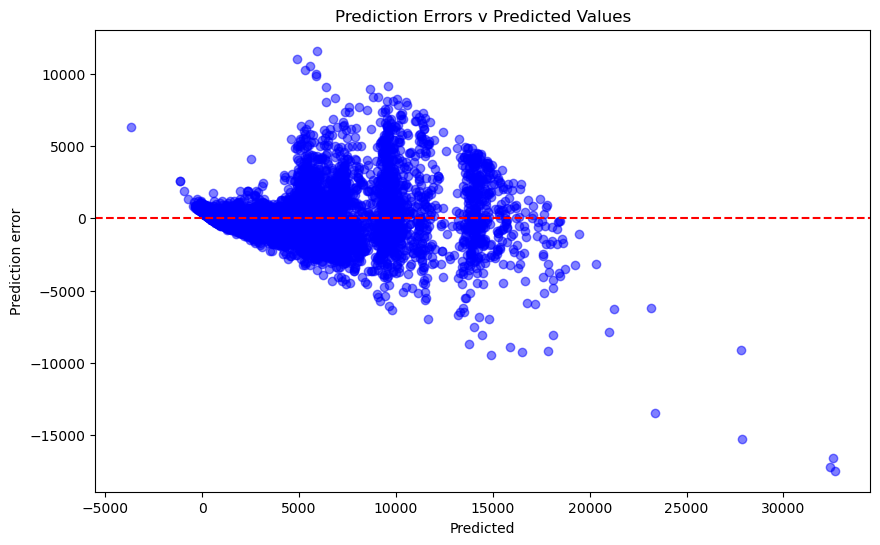

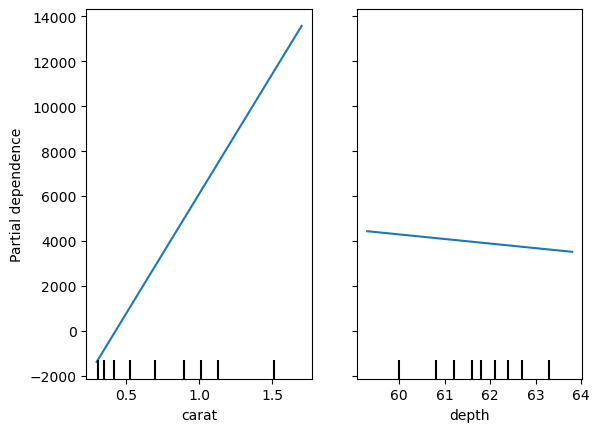

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# load dataset
diamonds = pd.read_csv("diamonds.csv")
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict values and compute prediction errors
y_pred = model.predict(X_test)
errors = y_test - y_pred

# plot prediction errors v predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Prediction error")
plt.title("Prediction Errors v Predicted Values")
plt.show()

# partial dependence display
features = ['carat', 'depth']
PartialDependenceDisplay.from_estimator(model, X, features)
plt.show()
